In [1]:
!pip install numpy tensorflow pillow


In [2]:
import os
import numpy as np
from tensorflow.keras.datasets import mnist
from PIL import Image

# Définir le chemin où vous souhaitez enregistrer les images MNIST
save_path = 'mnist_images'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Charger les données MNIST
(x_train, _), (_, _) = mnist.load_data()

# Sauvegarder les 10 premières images MNIST
for i in range(10):
    image = Image.fromarray(x_train[i])
    image_path = os.path.join(save_path, f'mnist_{i}.png')
    image.save(image_path)
    print(f'Image {i} sauvegardée à l\'emplacement : {image_path}')


2024-05-19 16:03:39.746396: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 16:03:39.750547: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 16:03:39.810091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 16:03:40.854082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Image 0 sauvegardée à l'emplacement : mnist_images/mnist_0.png
Image 1 sauvegardée à l'emplacement : mnist_images/mnist_1.png
Image 2 sauvegardée à l'emplacement : mnist_images/mnist_2.png
Image 3 sauvegardée à l'emplacement : mnist_images/mnist_3.png
Image 4 sauvegardée à l'emplacement : mnist_images/mnist_4.png
Image 5 sauvegardée à l'emplacement : mnist_images/mnist_5.png
Image 6 sauvegardée à l'emplacement : mnist_images/mnist_6.png
Image 7 sauvegardée à l'emplacement : mnist_images/mnist_7.png
Image 8 sauvegardée à l'emplacement : mnist_images/mnist_8.png
Image 9 sauvegardée à l'emplacement : mnist_images/mnist_9.png


In [5]:
import requests
import json
from PIL import Image
import numpy as np
import os

# Define the path where the MNIST images are saved
save_path = 'mnist_images'

# Choose an image for prediction (e.g., the first MNIST image)
selected_image_idx = 0
image_path = os.path.join(save_path, f'mnist_{selected_image_idx}.png')

# Load the image with PIL and prepare it for the model
img = Image.open(image_path).convert('L')
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)
img_list = img_array.tolist()

# URL of your Flask service
URL = 'http://54.196.41.2:5000/predict'

# Prepare the data to be sent
data = json.dumps({'image': img_list})

# Set headers for the request
headers = {'Content-Type': 'application/json'}

# Send the POST request with the image data
result = requests.post(URL, data=data, headers=headers)

# Display the server's response
print(f"Prediction = {result.text}")



Prediction = {"prediction":5}



Prediction = {'prediction': 5}
Predicted Class: 5


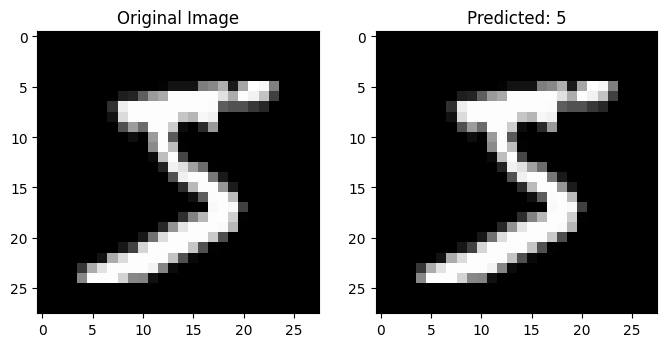

In [4]:
import requests
import json
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path where the MNIST images are saved
save_path = 'mnist_images'

# Choose an image for prediction (e.g., the first MNIST image)
selected_image_idx = 0
image_path = os.path.join(save_path, f'mnist_{selected_image_idx}.png')

# Load the image with PIL and prepare it for the model
img = Image.open(image_path).convert('L')
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)
img_list = img_array.tolist()

# URL of your Flask service
URL = 'http://54.196.41.2:5000/predict'

# Prepare the data to be sent
data = json.dumps({'image': img_list})

# Set headers for the request
headers = {'Content-Type': 'application/json'}

# Send the POST request with the image data
result = requests.post(URL, data=data, headers=headers)
response = result.json()

# Display the server's response
print(f"Prediction = {response}")

# Assuming MNIST (0-9 digits), but if it's Fashion MNIST, you can create a similar dictionary
#class_names = ["T-shirt/top", "Trouser", "Pullover", ..., "Ankle boot"]
class_names = [str(i) for i in range(10)]  # For MNIST digits
predicted_class = class_names[response['prediction']]

print(f"Predicted Class: {predicted_class}")

# Display the original and predicted images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


Raw Response Text: {"prediction":5}

Status Code: 200
Prediction = {'prediction': 5}
Predicted Class: 5


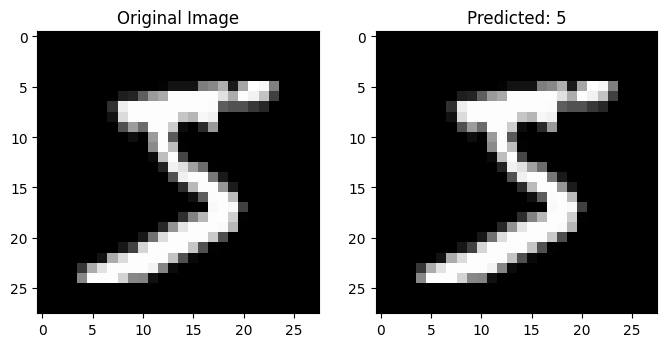

In [6]:
import requests
import json
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path where the MNIST images are saved
save_path = 'mnist_images'

# Choose an image for prediction (e.g., the first MNIST image)
selected_image_idx = 0
image_path = os.path.join(save_path, f'mnist_{selected_image_idx}.png')

# Load the image with PIL and prepare it for the model
img = Image.open(image_path).convert('L')
img = img.resize((28, 28))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)
img_list = img_array.tolist()

# URL of your Flask service
URL = 'http://54.196.41.2:5000/predict'

# Prepare the data to be sent
data = json.dumps({'image': img_list})

# Set headers for the request
headers = {'Content-Type': 'application/json'}

# Send the POST request with the image data
result = requests.post(URL, data=data, headers=headers)

# Print raw response text for debugging
print(f"Raw Response Text: {result.text}")

# Check the status code
print(f"Status Code: {result.status_code}")

if result.status_code == 200:
    try:
        # Try to parse the JSON response
        response = result.json()
        print(f"Prediction = {response}")
        
        # Assuming MNIST (0-9 digits), but if it's Fashion MNIST, you can create a similar dictionary
        class_names = [str(i) for i in range(10)]  # For MNIST digits
        predicted_class = class_names[response['prediction']]
        
        print(f"Predicted Class: {predicted_class}")
        
        # Display the original and predicted images
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title("Original Image")
        plt.subplot(1, 2, 2)
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_class}")
        plt.show()
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
else:
    print(f"Request failed with status: {result.status_code}")
